In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import photRM # credits Dr Anđelka Kovačević & Isidora Jankov (https://github.com/LSST-sersag/dle)
from rm_utils import ZDCF, load_results_ZDCF, PLIKE # functions to wrap fortran programs
%load_ext autoreload


In [ ]:
# load interps

In [ ]:
# detrend 
from numpy.polynomial import Polynomial
# Fit a fourth-order polynomial to the data
poly = Polynomial.fit(t, y, 4)
poly_y = poly(t)

# Detrend the data by subtracting the polynomial
detrended_y = y - poly_y


In [3]:
%autoreload

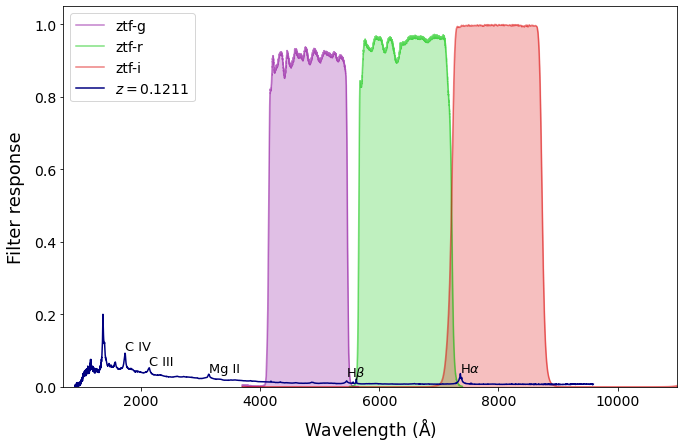

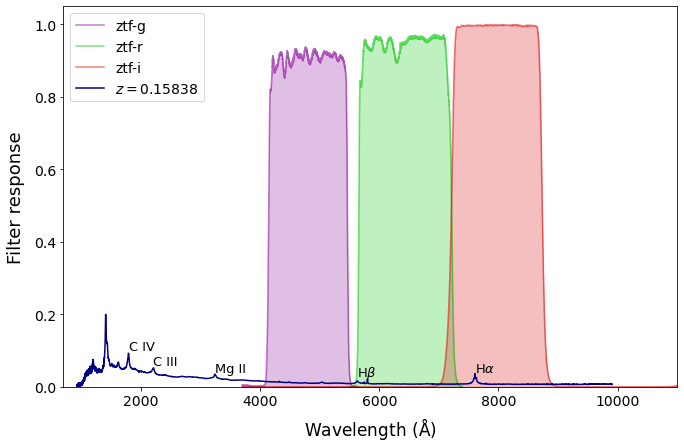

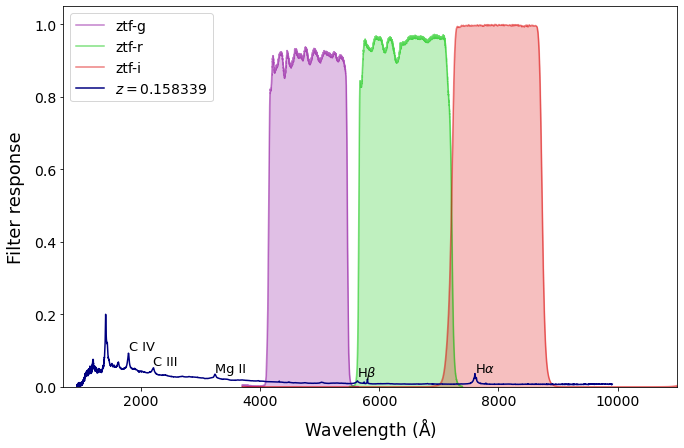

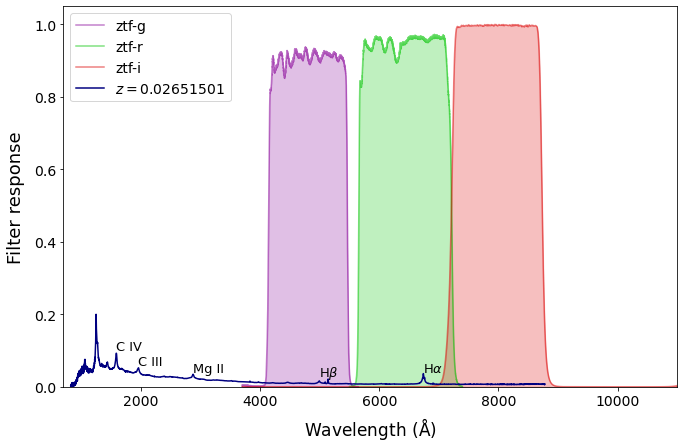

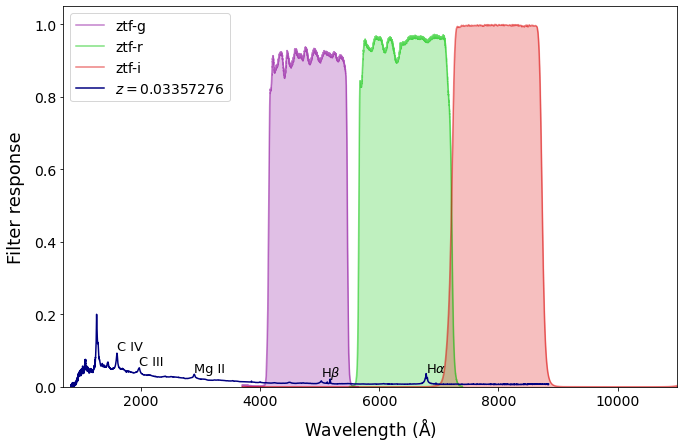

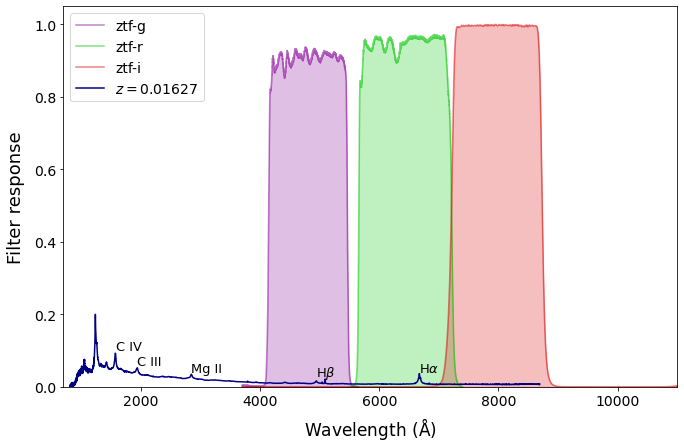

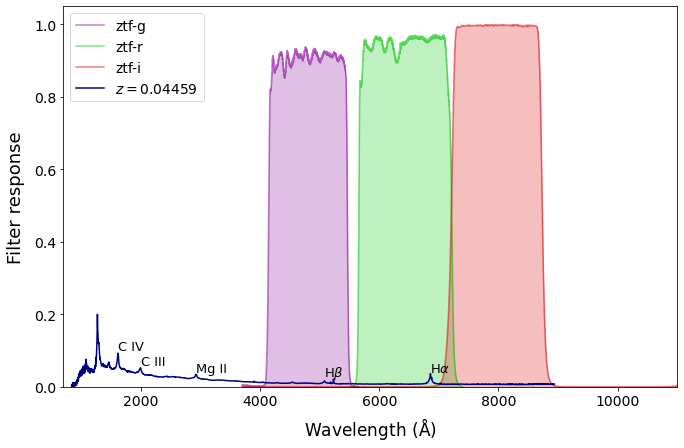

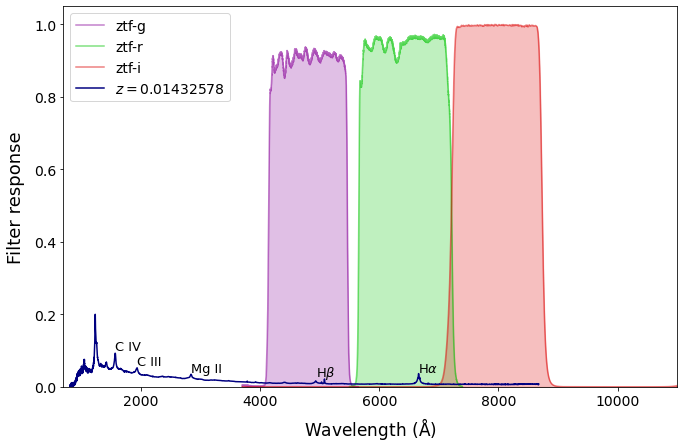

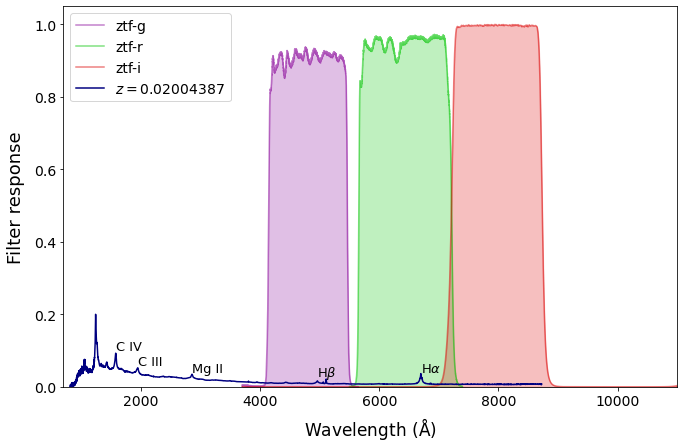

In [8]:
zs = [0.1211    , 0.15838   , 0.158339  , 0.02651501, 0.03357276, 0.01627   , 0.04459   , 0.01432578, 0.02004387]
for z in zs:
    
    photRM.filters_viz(z=z, phot_sys='ZTF', save=False)

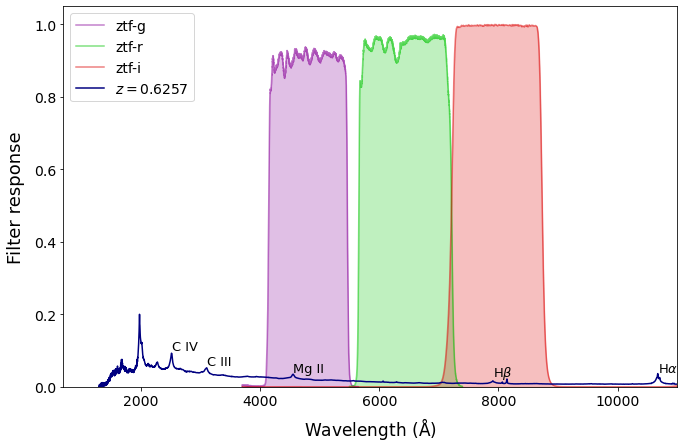

In [4]:
photRM.filters_viz(z =0.6257, phot_sys='ZTF', save=True)

In [2]:
# hopefully this command returns a no input files error
! gfortran

# otherwise you'll need to run the command 
#   ---> brew install gcc

gfortran: fatal error: no input files
compilation terminated.


## Compile the fortran programs if they aren't already

In [3]:
FORTRAN_DIR = 'fortran_dir'
os.chdir(FORTRAN_DIR)
! gfortran zdcf_v2.2.f90 -o zdcf
! gfortran plike_v4.0.f90 -o plike
os.chdir('../')

In [4]:
%autoreload

In [5]:
fortran_dir='/Users/mattlowery/Desktop/code/astro/hetvae/src/reverberation_mapping/fortran_dir'
os.chdir('/Users/mattlowery/Desktop/code/astro/hetvae/src/reverberation_mapping')

- **<font color='violet'> $g$-band covers continuum </font>**
- **<font color='#0AD304'>$r$-band covers Hb and continuum </font>**
- **<font color='indianred'> $i$-band covers Ha and continuum </font>**

We choose **g band** for pure continuum light curve (X-band) and **r band** for continuum + line light curve (Y-band).

**Note:** i-band light curves usually have much lower number of points compared to g and r bands, which is the reason for not considering it in this analysis.

## Averaging duplicates in the light curves

In [58]:
# B,G,V,R,I,Z

B = '3C273_Bband_truncated_detrended_1st-order_new.dat'
G = '3C273_Gband_truncated_detrended_1st-order_new.dat'
V = '3C273_Vband_truncated_detrended_1st-order_new.dat'
R = '3C273_Rband_truncated_detrended_1st-order_new.dat'
I = '3C273_Iband_truncated_detrended_1st-order_new.dat'
Z = '3C273_Zband_truncated_detrended_1st-order_new.dat'

# new fns
B_ = B.split('band')[0]
G_ = G.split('band')[0]
V_ = V.split('band')[0]
R_ = R.split('band')[0]
I_ = I.split('band')[0]
Z_ = Z.split('band')[0]

os.chdir('/Users/mattlowery/Desktop/code/astro/hetvae/src/reverberation_mapping/fortran_dir/3C_273_data')

## averaging duplicates in the light curves and saving them again
## also outlier filtering by removing all points w/ greater than 1 magerr

B_df = pd.read_csv(B, sep=' ', header=None)
B_df = B_df.groupby(0).mean().reset_index()
B_df = B_df[B_df[2] < 1]
B_df.to_csv(B_, sep=' ', header=False, index=False)
################
G_df = pd.read_csv(G, sep=' ', header=None)
G_df = G_df.groupby(0).mean().reset_index()
G_df = G_df[G_df[2] < 1]
G_df.to_csv(G_, sep=' ', header=False, index=False)
#################
V_df = pd.read_csv(V, sep=' ', header=None)
V_df = V_df.groupby(0).mean().reset_index()
V_df = V_df[V_df[2] < 1]
V_df.to_csv(V_, sep=' ', header=False, index=False)
#################
R_df = pd.read_csv(R, sep=' ', header=None)
R_df = R_df.groupby(0).mean().reset_index()
R_df = R_df[R_df[2] < 1]
R_df.to_csv(R_, sep=' ', header=False, index=False)
#################
I_df = pd.read_csv(I, sep=' ', header=None)
I_df = I_df.groupby(0).mean().reset_index()
I_df = I_df[I_df[2] < 1]
I_df.to_csv(I_, sep=' ', header=False, index=False)
#################
Z_df = pd.read_csv(Z, sep=' ', header=None)
Z_df = Z_df.groupby(0).mean().reset_index()
Z_df = Z_df[Z_df[2] < 1]
Z_df.to_csv(Z_, sep=' ', header=False, index=False)

In [59]:
## move new lcs into fortran_dir
! cp -r 3C273_? ../

## Quick plotting 

Text(0.5, 1.0, '3C273')

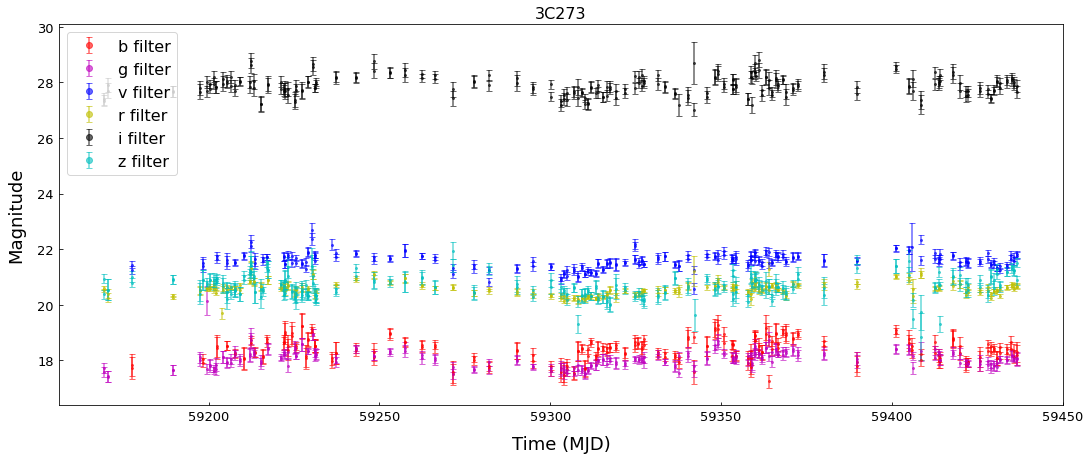

In [60]:
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()
# g and v the same? 
ax.errorbar(B_df[0], B_df[1], yerr=B_df[2], fmt='ro', markersize=2,alpha=0.6,capsize=3, label='b filter')
ax.errorbar(G_df[0], G_df[1], yerr=G_df[2], fmt='mo', markersize=2,alpha=0.6,capsize=3, label='g filter')
ax.errorbar(V_df[0], V_df[1], yerr=V_df[2], fmt='bo', markersize=2,alpha=0.6,capsize=3, label='v filter')
ax.errorbar(R_df[0], R_df[1], yerr=R_df[2], fmt='yo', markersize=2,alpha=0.6,capsize=3, label='r filter')
ax.errorbar(I_df[0], I_df[1], yerr=I_df[2], fmt='ko', markersize=2,alpha=0.6,capsize=3, label='i filter')
ax.errorbar(Z_df[0], Z_df[1], yerr=Z_df[2], fmt='co', markersize=2,alpha=0.6,capsize=3, label='z filter')

ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
ax.tick_params(direction='in', pad = 5, labelsize=13)
ax.legend(fontsize=16, markerscale=3)
ax.set_title('3C273', size=16)


In [ ]:
# autocorrelation function w/ continuum
ZDCF(B_, B_, 'ccf_bb_3c273', acf=True, fortran_dir=fortran_dir)
# ccf w/ continuum and other bands
ZDCF(B_,G_, 'ccf_bg_3c273', fortran_dir=fortran_dir)
ZDCF(B_,V_, 'ccf_bv_3c273', fortran_dir=fortran_dir)
ZDCF(B_,R_, 'ccf_br_3c273', fortran_dir=fortran_dir)
ZDCF(B_,I_, 'ccf_bi_3c273', fortran_dir=fortran_dir)
ZDCF(B_,Z_, 'ccf_bz_3c273', fortran_dir=fortran_dir)

## ZDCF saves results as ___.dcf

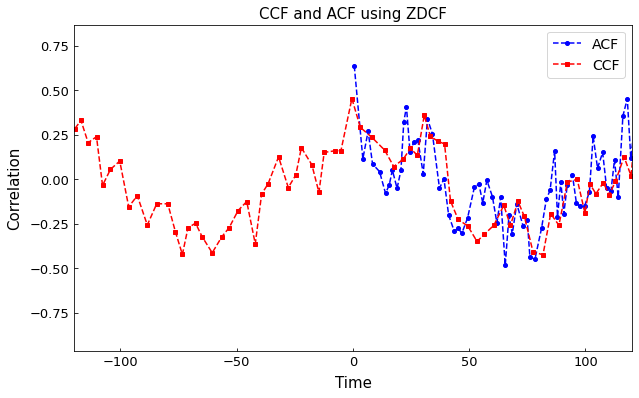

In [62]:
acf, ccf_bg = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_bg_3c273.dcf', fortran_dir=fortran_dir, plot=True)
_, ccf_bv = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_bv_3c273.dcf', fortran_dir=fortran_dir, plot=False)
_, ccf_br = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_br_3c273.dcf', fortran_dir=fortran_dir, plot=False)
_, ccf_bi = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_bi_3c273.dcf', fortran_dir=fortran_dir, plot=False)
_, ccf_bz = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_bz_3c273.dcf', fortran_dir=fortran_dir, plot=False)

# G band lag

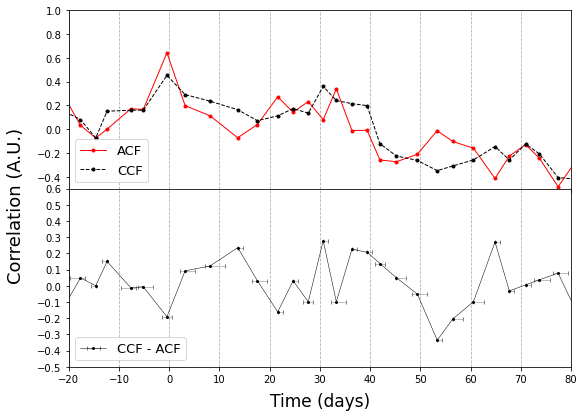

In [63]:
# since ZDCF does not provide the ACF on the negative tau axis, we need to add it:
acf_total = photRM.add_inverted_acf(acf)
# We still need to make CCF and ACF the same length so we could subtract them.
# We do this by interpolating one of those functions to the time grid of the other.
acf_interp_bg = photRM.interp(ccf_bg, acf_total) # first param is the function having the x-axis on which we want to interpolate the other function.
# Subtracting CCF and ACF
final_ccf_bg = photRM.delta_ccf(acf_interp_bg, ccf_bg)
final_ccf_bg.to_csv(os.path.join(fortran_dir,'plike_bg_3c273.dcf'), sep=" ", index=False, header=False)
final_ccf_bg.tail()
photRM.plot_ccf_acf(final_ccf_bg, ccf_bg, acf_interp_bg, locator=10)

In [64]:
#### James lags are in the range of 3-4 days, we see 2 peaks between 0-10 in CCF-ACF,
## one at 8-9 days, the other at 3
PLIKE('plike_bg_3c273.dcf', 0,8) 

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  8.000E+00

   1 data points found in time-lag range

 COM: Warning - Peak extends beyond range to the left.
 COM: Warning - Peak extends beyond range to the right.
ZDCF peak at  +3.177E+00 r_max =  +9.251E-02 ZDCF C.O.M. at  +3.177E+00

Progress meter: .

 CONF1: Warning - 1 sigma interval may extend beyond range to the right.
 CONF1: Warning - 1 sigma interval may extend beyond range to the left.
Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_bg_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  3.177E+00  9.251E-02  1.102E-01  1.090E-01  9.966E-01
#
# ML Peak at t_lag =  +3.177E+00, Likelihood at peak =  +9.966E-01
# 1 sigma ML t_lag interval =  +3.177E+00  +2.000E+00  -1.000E+00
#                           = (

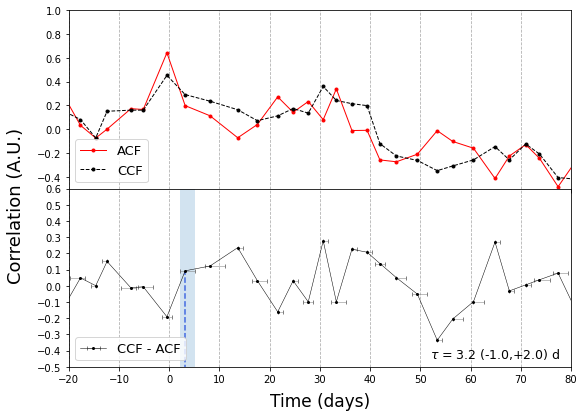

In [65]:
#+3.177E+00  +2.000E+00  -1.000E+00
tau = 3.177
err_low = -1.0
err_high = 2.0
photRM.plot_ccf_acf(final_ccf_bg, ccf_bg, acf_interp_bg, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

# V band lag

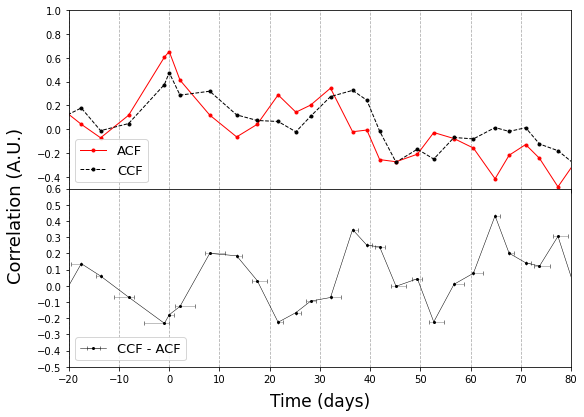

In [66]:
acf_interp_bv = photRM.interp(ccf_bv, acf_total)
final_ccf_bv = photRM.delta_ccf(acf_interp_bv, ccf_bv)
final_ccf_bv.to_csv(os.path.join(fortran_dir,'plike_bv_3c273.dcf'), sep=" ", index=False, header=False)
photRM.plot_ccf_acf(final_ccf_bv, ccf_bv, acf_interp_bv, locator=10)

In [67]:
## distinct peak at ~8 days that we want
PLIKE('plike_bv_3c273.dcf', 0,20)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  2.000E+01

   5 data points found in time-lag range

ZDCF peak at  +8.072E+00 r_max =  +2.002E-01 ZDCF C.O.M. at  +1.065E+01

Progress meter: .....

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_bv_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  1.842E-03 -1.789E-01  7.057E-02  6.867E-02  1.089E-05
     2  2.152E+00 -1.271E-01  8.069E-02  7.910E-02  1.047E-04
     3  8.072E+00  2.002E-01  1.132E-01  1.120E-01  5.077E-01
     4  1.343E+01  1.853E-01  1.368E-01  1.370E-01  4.256E-01
     5  1.752E+01  3.217E-02  1.392E-01  1.387E-01  4.697E-02
#
# ML Peak at t_lag =  +8.072E+00, Likelihood at peak =  +5.077E-01
# 1 sigma ML t_lag interval =  +8.072E+00  +5.045E+00  -2.586E+00
#                           = ( +5.

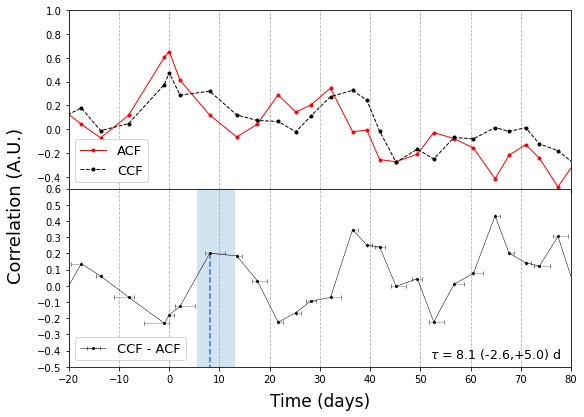

In [68]:
#+8.072E+00  +5.045E+00  -2.586E+00
tau = 8.072
err_low = -2.586
err_high = 5.045
photRM.plot_ccf_acf(final_ccf_bv, ccf_bv, acf_interp_bv, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

# R band lag

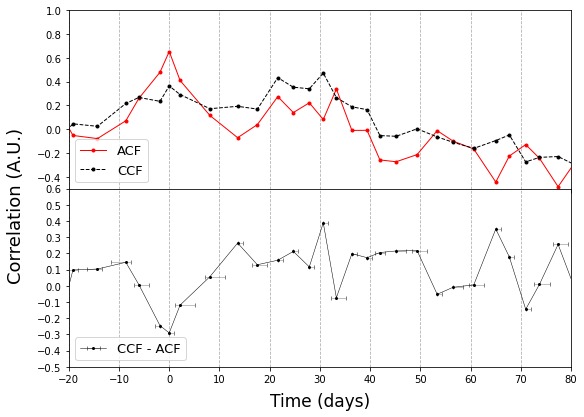

In [69]:
acf_interp_br = photRM.interp(ccf_br, acf_total)
final_ccf_br = photRM.delta_ccf(acf_interp_br, ccf_br)
final_ccf_br.to_csv(os.path.join(fortran_dir,'plike_br_3c273.dcf'), sep=" ", index=False, header=False)
photRM.plot_ccf_acf(final_ccf_br, ccf_br, acf_interp_br, locator=10)

In [70]:
## distinct peak ~14 days
PLIKE('plike_br_3c273.dcf', 0,30)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  3.000E+01

   8 data points found in time-lag range

ZDCF peak at  +1.363E+01 r_max =  +2.639E-01 ZDCF C.O.M. at  +1.363E+01

Progress meter: ........

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_br_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  6.202E-03 -2.908E-01  7.733E-02  7.554E-02  7.233E-11
     2  2.164E+00 -1.193E-01  8.178E-02  8.013E-02  3.663E-06
     3  8.102E+00  5.634E-02  1.167E-01  1.159E-01  8.631E-03
     4  1.363E+01  2.639E-01  1.368E-01  1.367E-01  4.466E-01
     5  1.756E+01  1.300E-01  1.385E-01  1.376E-01  6.652E-02
     6  2.162E+01  1.580E-01  1.469E-01  1.422E-01  1.446E-01
     7  2.472E+01  2.122E-01  1.463E-01  1.436E-01  2.412E-01
     8  2.790E+01  1.168E-01  1.408E-01  1.

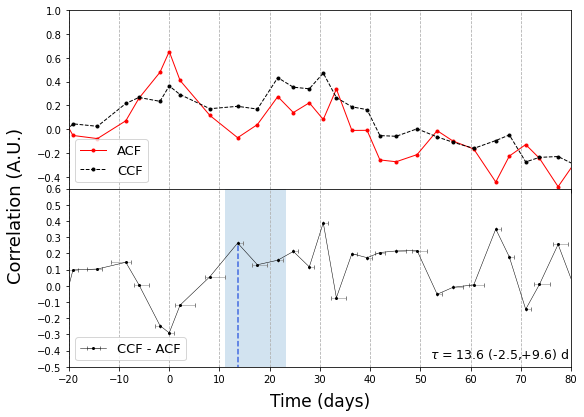

In [72]:
#+1.363E+01  +9.595E+00  -2.530E+00
tau = 13.63
err_low = -2.53
err_high = 9.595
photRM.plot_ccf_acf(final_ccf_br, ccf_br, acf_interp_br, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

# I band lag

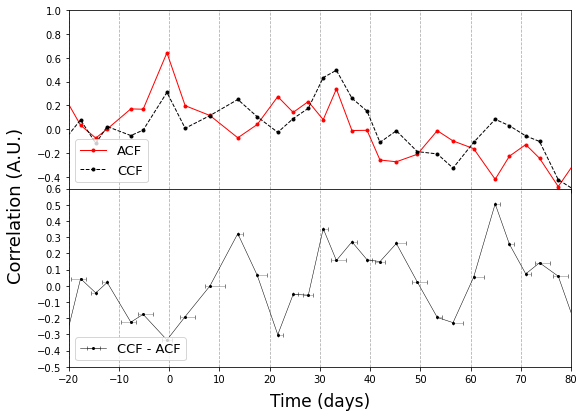

In [73]:
acf_interp_bi = photRM.interp(ccf_bi, acf_total)
final_ccf_bi = photRM.delta_ccf(acf_interp_bi, ccf_bi)
final_ccf_bi.to_csv(os.path.join(fortran_dir,'plike_bi_3c273.dcf'), sep=" ", index=False, header=False)
photRM.plot_ccf_acf(final_ccf_bi, ccf_bi, acf_interp_bi, locator=10)

In [74]:
## distinct peak at ~14 days
PLIKE('plike_bi_3c273.dcf', 0,30)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  3.000E+01

   7 data points found in time-lag range

ZDCF peak at  +1.366E+01 r_max =  +3.221E-01 ZDCF C.O.M. at  +1.366E+01

Progress meter: .......

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_bi_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  3.180E+00 -1.901E-01  1.144E-01  1.140E-01  8.985E-06
     2  8.106E+00 -1.172E-03  1.172E-01  1.165E-01  5.124E-03
     3  1.366E+01  3.221E-01  1.352E-01  1.349E-01  9.184E-01
     4  1.754E+01  6.419E-02  1.392E-01  1.385E-01  3.234E-02
     5  2.162E+01 -3.016E-01  1.579E-01  1.551E-01  3.334E-05
     6  2.469E+01 -5.285E-02  1.535E-01  1.520E-01  4.447E-03
     7  2.770E+01 -5.776E-02  1.457E-01  1.435E-01  3.023E-03
#
# ML Peak at t_lag =  +1.366E+01, Likeliho

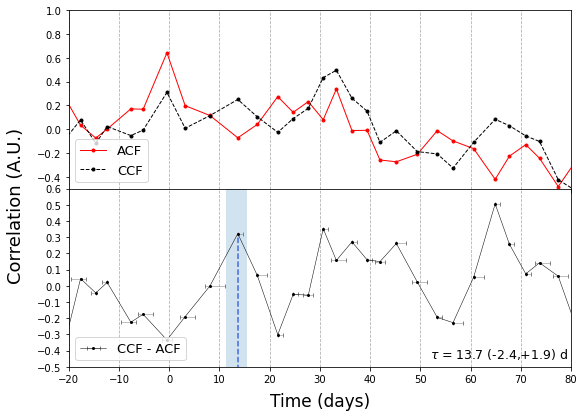

In [75]:
# +1.366E+01  +1.876E+00  -2.447E+00
tau = 13.66
err_low = -2.445
err_high = 1.876
photRM.plot_ccf_acf(final_ccf_bi, ccf_bi, acf_interp_bi, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

# Z band lag

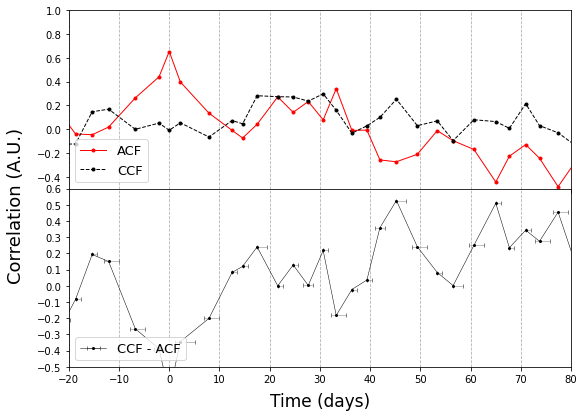

In [76]:
acf_interp_bz = photRM.interp(ccf_bz, acf_total)
final_ccf_bz = photRM.delta_ccf(acf_interp_bz, ccf_bz)
final_ccf_bz.to_csv(os.path.join(fortran_dir,'plike_bz_3c273.dcf'), sep=" ", index=False, header=False)
photRM.plot_ccf_acf(final_ccf_bz, ccf_bz, acf_interp_bz, locator=10)

In [79]:
## a bit more unclear, James' lags are 30-40, we have significant peaks at ~45ish 41ish days
PLIKE('plike_bz_3c273.dcf', 20,60)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  2.000E+01 to  6.000E+01

  12 data points found in time-lag range

ZDCF peak at  +4.524E+01 r_max =  +5.265E-01 ZDCF C.O.M. at  +4.391E+01

Progress meter: ............

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_bz_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  2.161E+01  9.973E-06  1.540E-01  1.498E-01  1.535E-04
     2  2.469E+01  1.287E-01  1.499E-01  1.475E-01  9.688E-04
     3  2.769E+01  2.295E-03  1.447E-01  1.423E-01  1.652E-05
     4  3.066E+01  2.180E-01  1.628E-01  1.608E-01  9.658E-03
     5  3.326E+01 -1.828E-01  1.492E-01  1.469E-01  2.561E-08
     6  3.638E+01 -2.284E-02  1.594E-01  1.599E-01  1.695E-05
     7  3.937E+01  3.594E-02  1.627E-01  1.625E-01  1.578E-04
     8  4.196E+01  3.586E-01  1.503E-01

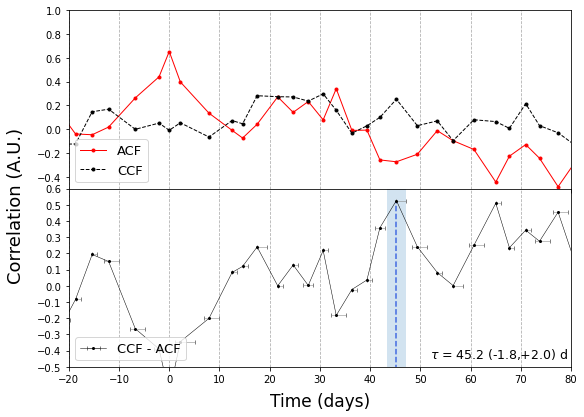

In [80]:
# +4.524E+01  +2.000E+00  -1.782E+00
tau = 45.24
err_low = -1.782
err_high = 2.0
photRM.plot_ccf_acf(final_ccf_bz, ccf_bz, acf_interp_bz, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

# RESULTS (days)


### G band lag = 3.177  +2.000  -1.000

### V band lag = 8.072  +5.045  -2.586

### R band lag = 13.63  +9.595  -2.530

### I band lag = 13.66  +1.876  -2.447

### Z band lag = 45.24  +2.000  -1.782



